In [1]:
import numpy as np
import matplotlib.pyplot as mp
import uncertainties as uc
import uncertainties.umath as um
import uncertainties.unumpy as unp
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.rcParams["text.usetex"] = True
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["font.family"] = "serif"

In [42]:
Vbc = lambda RT, R1, Vs: RT/(R1 + RT) * Vs
Vfb = lambda RT, R1, R2, R3, Vs: Vs*(RT/(RT + R3) - R2/(R2 + R1))

## Voltage divider

In [3]:
res = np.array([1068, 106.5, 108.5, 107.5, 26.2, 300.4, 184.3, 815, 467.4])
res = unp.uarray(res, res*0.05)
R1 = 100
ohm_theo = np.linspace(0, 1100, 100)

In [11]:
voltdiv = np.loadtxt("voltdiv.txt")
voltdiv = unp.uarray(voltdiv.T, [voltdiv.T[0]*0.05, voltdiv.T[1]*0.02, voltdiv.T[2]*0.02, voltdiv.T[3]*0.02]).T
ohm, v1_5, v2_2, v3_7 = voltdiv.T

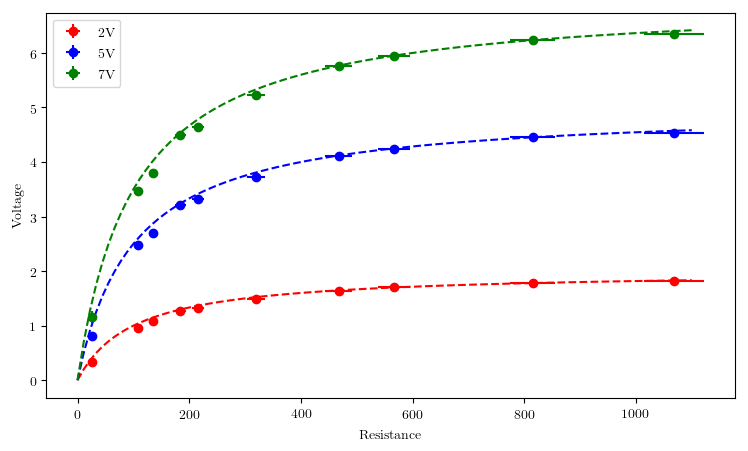

In [16]:
#mp.plot(ohm, -v2_2, "ro")
#mp.plot(ohm, v2_2, "ro")
#mp.plot(ohm, -v2_2+2, "ro", label="2V")
mp.errorbar(unp.nominal_values(ohm), -unp.nominal_values(v2_2)+2, unp.std_devs(v2_2), unp.std_devs(ohm), "ro", label="2V")
mp.plot(ohm_theo, Vbc(ohm_theo, R1, 2), "r--")

#mp.plot(ohm, -v1_5, "bo")
#mp.plot(ohm, v1_5, "bo")
#mp.plot(ohm, -v1_5+5, "bo", label="5V")
mp.errorbar(unp.nominal_values(ohm), -unp.nominal_values(v1_5)+5, unp.std_devs(v1_5), unp.std_devs(ohm), "bo", label="5V")
mp.plot(ohm_theo, Vbc(ohm_theo, R1, 5), "b--")

#mp.plot(ohm, -v3_7, "go")
#mp.plot(ohm, v3_7, "go")
#mp.plot(ohm, -v3_7+7, "go", label="7V")
mp.errorbar(unp.nominal_values(ohm), -unp.nominal_values(v3_7)+7, unp.std_devs(v3_7), unp.std_devs(ohm), "go", label="7V")
mp.plot(ohm_theo, Vbc(ohm_theo, R1, 7), "g--")

mp.xlabel("Resistance")
mp.ylabel("Voltage")
mp.legend()

mp.savefig("voltdiv.png", dpi=300, bbox_inches="tight")
mp.show()

## Wheatstone bridge

In [17]:
R1 = 980
R2 = 983
R3 = 995

In [14]:
ohm_theo = np.linspace(0, 1000, 100)

In [19]:
wheat = np.loadtxt("wheatstone.txt")
wheat = unp.uarray(wheat.T, [wheat.T[0]*0.05, wheat.T[1]*0.02, wheat.T[2]*0.02, wheat.T[3]*0.02]).T
ohm, v1_2, v2_5, v3_7 = wheat.T

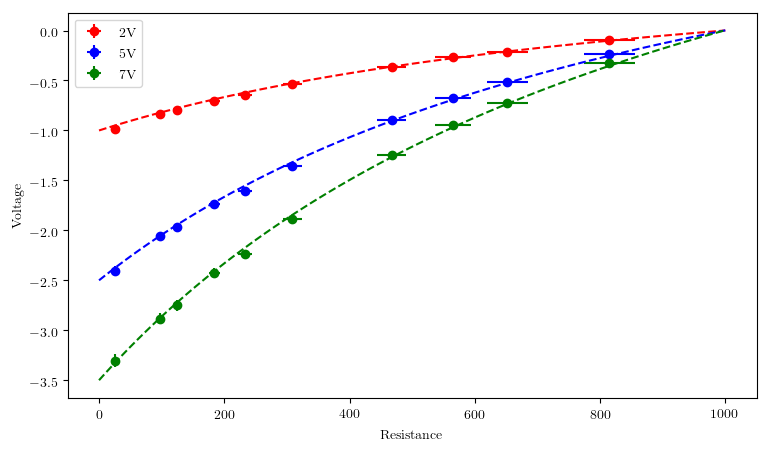

In [22]:
#mp.plot(ohm, -v1_2, "ro", label="2V")
mp.plot(ohm_theo, Vfb(ohm_theo, R1, R2, R3, 2), "r--")
mp.errorbar(unp.nominal_values(ohm), -unp.nominal_values(v1_2), unp.std_devs(v1_2), unp.std_devs(ohm), "ro", label="2V")

#mp.plot(ohm, -v2_5, "bo", label="5V")
mp.plot(ohm_theo, Vfb(ohm_theo, R1, R2, R3, 5), "b--")
mp.errorbar(unp.nominal_values(ohm), -unp.nominal_values(v2_5), unp.std_devs(v2_5), unp.std_devs(ohm), "bo", label="5V")

#mp.plot(ohm, -v3_7, "go", label="7V")
mp.plot(ohm_theo, Vfb(ohm_theo, R1, R2, R3, 7), "g--")
mp.errorbar(unp.nominal_values(ohm), -unp.nominal_values(v3_7), unp.std_devs(v3_7), unp.std_devs(ohm), "go", label="7V")

mp.xlabel("Resistance")
mp.ylabel("Voltage")
mp.legend()

mp.savefig("wheatstone.png", dpi=300, bbox_inches="tight")
mp.show()

## 7 Feb

In [8]:
res = np.loadtxt("res.txt")
res = unp.uarray(res, res*0.05)

In [47]:
R1 = 97.9
R1 = uc.ufloat(R1, R1*0.05)
vdiv = np.loadtxt("voltdiv2.txt")
vdiv = unp.uarray(vdiv.T, [vdiv.T[0]*0.05, vdiv.T[1]*0.02, vdiv.T[2]*0.02, vdiv.T[3]*0.02]).T
RT, v2, v5, v7 = vdiv.T

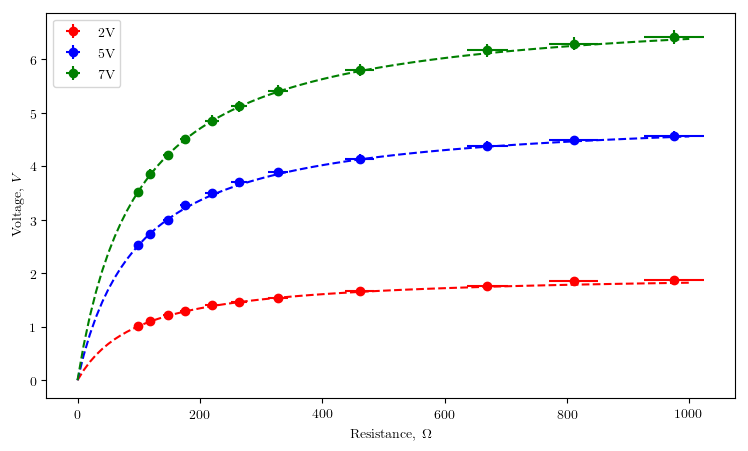

In [48]:
mp.errorbar(unp.nominal_values(RT), unp.nominal_values(v2), unp.std_devs(v2), unp.std_devs(RT), "ro", label="2V")
mp.plot(ohm_theo, Vbc(ohm_theo, R1.n, 2), "r--")

mp.errorbar(unp.nominal_values(RT), unp.nominal_values(v5), unp.std_devs(v5), unp.std_devs(RT), "bo", label="5V")
mp.plot(ohm_theo, Vbc(ohm_theo, R1.n, 5), "b--")

mp.errorbar(unp.nominal_values(RT), unp.nominal_values(v7), unp.std_devs(v7), unp.std_devs(RT), "go", label="7V")
mp.plot(ohm_theo, Vbc(ohm_theo, R1.n, 7), "g--")

mp.xlabel(r"Resistance, $\Omega$")
mp.ylabel(r"Voltage, $V$")
mp.legend()

mp.savefig("voltdiv2.png", dpi=300, bbox_inches="tight")
mp.show()

In [49]:
R1 = 975
R2 = 980
R3 = 987
R1 = uc.ufloat(R1, R1*0.05)
R2 = uc.ufloat(R2, R2*0.05)
R3 = uc.ufloat(R3, R3*0.05)

wheat = np.loadtxt("wheat2.txt")
wheat = unp.uarray(wheat.T, [wheat.T[0]*0.05, wheat.T[1]*0.02, wheat.T[2]*0.02, wheat.T[3]*0.02]).T
RT, v2, v5, v7 = wheat.T

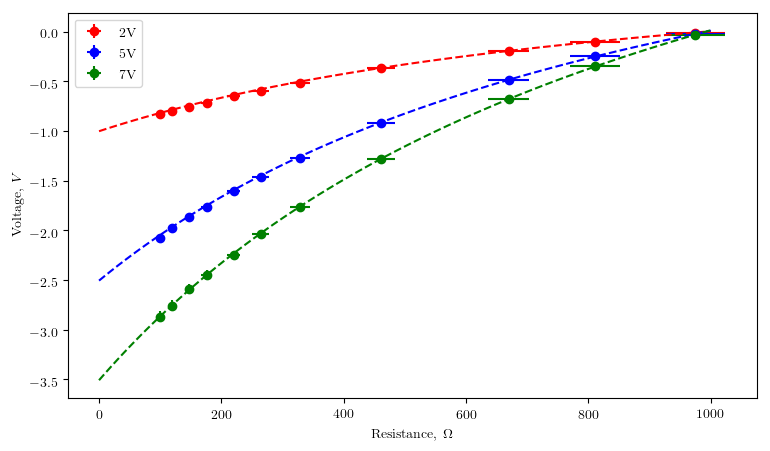

In [50]:
mp.plot(ohm_theo, Vfb(ohm_theo, R1.n, R2.n, R3.n, 2), "r--")
mp.errorbar(unp.nominal_values(RT), -unp.nominal_values(v2), unp.std_devs(v2), unp.std_devs(RT), "ro", label="2V")

mp.plot(ohm_theo, Vfb(ohm_theo, R1.n, R2.n, R3.n, 5), "b--")
mp.errorbar(unp.nominal_values(RT), -unp.nominal_values(v5), unp.std_devs(v5), unp.std_devs(RT), "bo", label="5V")

mp.plot(ohm_theo, Vfb(ohm_theo, R1.n, R2.n, R3.n, 7), "g--")
mp.errorbar(unp.nominal_values(RT), -unp.nominal_values(v7), unp.std_devs(v7), unp.std_devs(RT), "go", label="7V")

mp.xlabel(r"Resistance, $\Omega$")
mp.ylabel("Voltage, $V$")
mp.legend()

mp.savefig("wheatstone2.png", dpi=300, bbox_inches="tight")
mp.show()